# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages


## A. Compute performance metrics for the given data '5_a.csv'
 <pre>  <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df_a=pd.read_csv('/content/drive/MyDrive/5_Performance_metrics/5_a.csv')
df_a.head()
df_a['y_pred'] = df_a['proba'].apply(lambda x: 0.0 if x < 0.5 else 1.0 )
df_a.head()

,y,proba,y_pred
0,1.0,0.637387,1.0
1,1.0,0.635165,1.0
2,1.0,0.766586,1.0
3,1.0,0.724564,1.0
4,1.0,0.889199,1.0


In [10]:
len(df_a)

10100

In [40]:
# write your code here for task A
#1. compute confusion matrix
def confusion_matrix(y_true,y_pred):
  tp,tn,fp,fn = 0,0,0,0
  y_zip = zip(y_true,y_pred)
  for record in y_zip:
    if record[0] == 1 and record[1] == 1:
      tp+=1
    elif record[0] == 0 and record[1] == 0:
      tn+=1
    elif record[0] == 0 and record[1] == 1:
      fp+=1
    elif record[0] == 1 and record[1] == 0:
      fn+=1
    else:
      pass
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
  return tp,tn,fp,fn
  
tp,tn,fp,fn = confusion_matrix(df_a['y'],df_a['y_pred'])
print('confusion matrix : \n',  np.array([[tn,fp],[fn,tp]]))
print("-"*20+'consusion_matrix using pandas' +'-'*20)
pd.DataFrame(data = np.array([[tn,fp],[fn,tp]]),index = ['Actual_0','Actual_1'],columns = ['predicted_0','predicted_1']).style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '20px'})

confusion matrix : 
 [[    0   100]
 [    0 10000]]
--------------------consusion_matrix using pandas--------------------


,predicted_0,predicted_1
Actual_0,0,100
Actual_1,0,10000


In [15]:
# 2. Compute F1 Score
def f1_Score(y_true,y_pred):
  tp,tn,fp,fn = confusion_matrix(y_true,y_pred)
  precision = tp/(tp+fp)
  recall = tp/(fn+tp)
  f1_score = 2*((precision*recall)/(precision+recall))
  return f1_score
print('f1_score :', f1_Score(df_a['y'],df_a['y_pred']))


f1_score : 0.9950248756218906


AUC Score :  0.48829900000000004


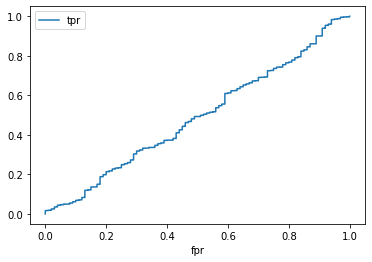

In [34]:
# 3. Compute AUC Score
def auc_score(y_true,y_prob):
  y_data = pd.DataFrame(list(zip(y_true,y_prob)), columns = ['y_true','y_prob'])
  y_data = y_data.sort_values(by='y_prob',ascending = False).reset_index(drop=True)
  prob_unique = np.sort(np.unique(y_data['y_prob']),)[::-1]
  fpr = []
  tpr = []
  for threshold in prob_unique:
    y_pred = y_data.y_prob.apply(lambda x: 0.0 if x < threshold else 1.0)
    fpr.append(fp/(tn+fp))
    tpr.append(tp/(fn+tp))
  auc_data = pd.DataFrame(list(zip(fpr,tpr)), columns = ['fpr','tpr'])
  auc_data.plot.line('fpr','tpr')
  return np.trapz(tpr, fpr)
print('AUC Score : ' , auc_score(df_a['y'],df_a['proba']))



In [36]:
# 4. Compute Accuracy Score
def accuracy_score(y_true,y_pred):
  tp,tn,fp,fn = confusion_matrix(y_true,y_pred)
  return ((tp+tn)/(tp+tn+fp+fn))
print('accuracy_score : ',accuracy_score(df_a['y'],df_a['y_pred']))



accuracy_score :  0.9900990099009901




## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a>
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [42]:
df_b=pd.read_csv('/content/drive/MyDrive/5_Performance_metrics/5_b.csv')
df_b.head()
df_b['y_pred'] = df_b['proba'].apply(lambda x: 0.0 if x < 0.5 else 1.0 )
df_b.head()

,y,proba,y_pred
0,0.0,0.281035,0.0
1,0.0,0.465152,0.0
2,0.0,0.352793,0.0
3,0.0,0.157818,0.0
4,0.0,0.276648,0.0


In [44]:
# write your code here for task B
# confusion matrix with defined funcitons
tp,tn,fp,fn = confusion_matrix(df_b['y'],df_b['y_pred'])
print('confusion matrix : \n',  np.array([[tn,fp],[fn,tp]]))
print("-"*20+'consusion_matrix using pandas' +'-'*20)
pd.DataFrame(data = np.array([[tn,fp],[fn,tp]]),index = ['Actual_0','Actual_1'],columns = ['predicted_0','predicted_1']).style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '20px'})

confusion matrix : 
 [[9761  239]
 [  45   55]]
--------------------consusion_matrix using pandas--------------------


,predicted_0,predicted_1
Actual_0,9761,239
Actual_1,45,55


In [45]:
#F1_score with predifined funcitons
print('f1_score :', f1_Score(df_b['y'],df_b['y_pred']))

f1_score : 0.2791878172588833


AUC Score :  0.9377570000000001


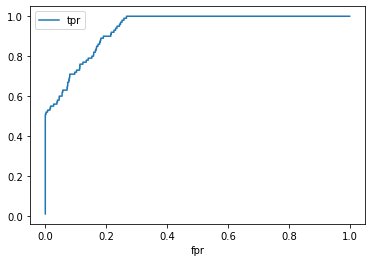

In [46]:
# auc using predifined function
print('AUC Score : ' , auc_score(df_b['y'],df_b['proba']))


In [47]:
# computing accuracy with predifined functions
print('accuracy_score : ',accuracy_score(df_b['y'],df_b['y_pred']))

accuracy_score :  0.9718811881188119


### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [48]:
df_c=pd.read_csv('/content/drive/MyDrive/5_Performance_metrics/5_c.csv')
df_c.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [58]:
 # write your code for task C
def best_threshold(y_true,y_prob):
  y_data = pd.DataFrame(list(zip(y_true,y_prob)), columns = ['y_true','y_prob'])
  y_data = y_data.sort_values(by='y_prob',ascending = False).reset_index(drop=True)
  prob_unique = np.sort(np.unique(y_data['y_prob']),)[::-1]
  #took A as infinity for calculation
  A = 78943465735678
  best_threshold = None
  fn_out = None
  fp_out = None
  for threshold in prob_unique:
    y_pred = y_data.y_prob.apply(lambda x: 0.0 if x < threshold else 1.0)
    tp,tn,fp,fn = confusion_matrix(y_data['y_true'],y_pred)
    if A > ((500 * fn) + (100 * fp)):
      #print('old A : ',A)
      #print('old threshold : ',best_threshold)
      A = ((500 * fn) + (100 * fp))
      best_threshold = threshold
      fn_out = fn
      fp_out = fp
      #print('fn : {0} and fp : {1}'.format(fn,fp))
      #print('new A : ',A)
      #print('new threshold : ',best_threshold)
    else:
      pass
  return best_threshold,A,fn_out,fp_out
best_threshold,A,fn,fp = best_threshold(df_c['y'],df_c['prob'])
print("Best Threshold identified as : {0} which have A value : {1} for false negetive : {2} and flase positive : {3} ".format(best_threshold,A,fn,fp))


Best Threshold identified as : 0.2300390278970873 which have A value : 141000 for false negetive : 78 and flase positive : 1020 



## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [59]:
df_d=pd.read_csv('/content/drive/MyDrive/5_Performance_metrics/5_d.csv')
df_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [75]:
 # write your code for task 5d

# calculating Mean Square Error
def mean_square_error(y_true,y_pred):
  dataframe = pd.DataFrame(data = list(zip(y_true,y_pred)),columns = ['y_true','y_pred'])
  dataframe['error'] =  dataframe['y_pred'] - dataframe['y_true']
  dataframe['square error'] =  dataframe['error'].apply(lambda X:X**2)
  mean_square_error = dataframe['square error'].mean()
  return mean_square_error
print('mean sqaured error : ',mean_square_error(df_d['y'],df_d['pred']))


mean sqaured error :  177.16569974554707


In [82]:
# calculating MAPE (mean obsolute percentage error)
def MAPE(y_true,y_pred):
  dataframe = pd.DataFrame(data = list(zip(y_true,y_pred)),columns = ['y_true','y_pred'])
  dataframe['error'] = dataframe['y_true'] - dataframe['y_pred']
  dataframe['obsolute error'] =  dataframe['error'].apply(lambda X:np.abs(X))
  modeified_mean_obsolute_percentage_error = (dataframe['obsolute error'].sum() / dataframe['y_true'].sum())
  #print(dataframe.head())
  return modeified_mean_obsolute_percentage_error
print('MAPE : ',MAPE(df_d['y'],df_d['pred']))

MAPE :  0.1291202994009687


In [95]:
# computing R^2 value

def r_squared(y_true,y_pred):
  dataframe = pd.DataFrame(data = list(zip(y_true,y_pred)),columns = ['y_true','y_pred'])
  ss_total = ((dataframe['y_true'] - dataframe['y_true'].mean()).apply(lambda x : x**2)).sum()
  ss_residual = ((dataframe['y_true'] - dataframe['y_pred']).apply(lambda x: x**2)).sum()
  return (1- (ss_residual/ss_total))
print('r_squared : ',r_squared(df_d['y'],df_d['pred']))

r_squared :  0.9563582786990937
